In [13]:
import sys; sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import *

sns.set_style("whitegrid")

# data
For each day and currency, we observe the the FX spot return (vs USD), the number of days until the next 'own' and FOMC policy meeting, whether they are scheduled or not, and the direction of the rate change that they culminated in. For instance, on 2001-01-17 there were 6 days until the next policy meeting at the Bank of Canada, and 14 days until the next FOMC meeting, both scheduled and to result in a rate cut.

In [14]:
data = pd.read_csv("../data/processed/data.csv")

data.head(1).style.format()

,currency,date,date_announcement_own,n_days_own,fx_return,direction_own,is_scheduled_own,date_announcement_fomc,n_days_fomc,direction_fomc,is_scheduled_fomc
0,cad,2001-01-17 16:00:00-05:00,2001-01-23 10:00:00-05:00,-4,-0.568700,cut,True,2001-01-31 14:00:00-05:00,-10,cut,True


# analysis

Let's take a look at the historical dynamics of spot exchange rates ahead of monetary policy meetings, irrespective of the policy decision:

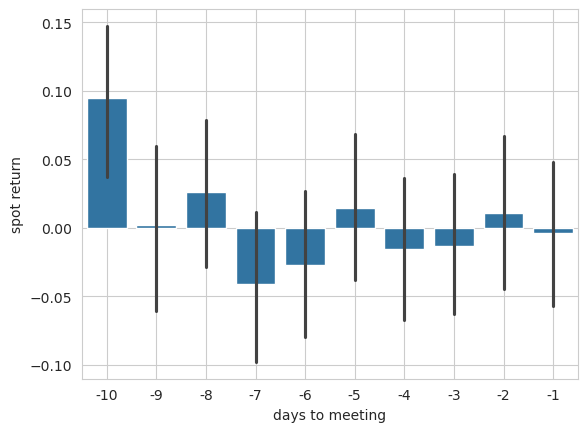

In [15]:
fig, ax = plt.subplots()
sns.barplot(
    data=data.query("is_scheduled_own"),
    x="n_days_own", 
    y="fx_return",
    ax=ax
)
ax.set_xlabel("days to meeting")
ax.set_ylabel("spot return")
ax.grid(axis="x")

Now, let's do the same for the FOMC meetings.

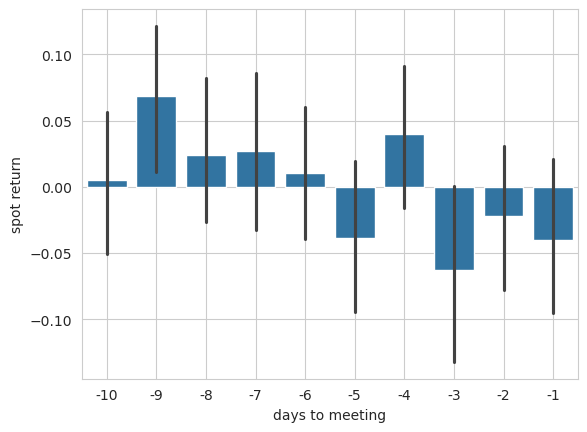

In [16]:
fig, ax = plt.subplots()
sns.barplot(
    data=data.query("is_scheduled_fomc"),
    x="n_days_fomc", 
    y="fx_return",
    ax=ax
)
ax.set_xlabel("days to meeting")
ax.set_ylabel("spot return")
ax.grid(axis="x")

Now, let's redo figure 1 with a breakdown into rate cuts, hikes and no-changes.

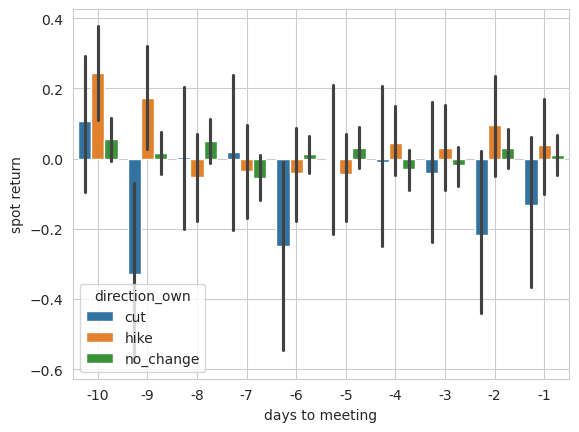

In [18]:
fig, ax = plt.subplots()
sns.barplot(
    data=data.query("is_scheduled_own"),
    x="n_days_own", 
    y="fx_return",
    ax=ax,
    hue="direction_own", hue_order=["cut", "hike", "no_change"]
)
ax.set_xlabel("days to meeting")
ax.set_ylabel("spot return")
ax.grid(axis="x")

What about FOMC with a breakdown?

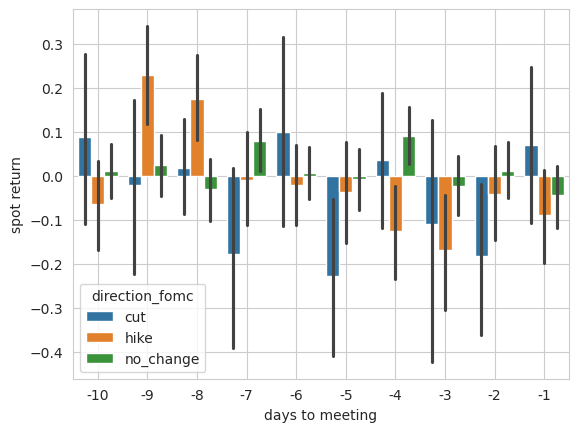

In [19]:
fig, ax = plt.subplots()
sns.barplot(
    data=data.query("is_scheduled_fomc"),
    x="n_days_fomc", 
    y="fx_return",
    ax=ax,
    hue="direction_fomc", hue_order=["cut", "hike", "no_change"]
)
ax.set_xlabel("days to meeting")
ax.set_ylabel("spot return")
ax.grid(axis="x")